In [1]:
%run ../../algorithmeX.ipynb

## [Polyominos](https://fr.wikipedia.org/wiki/Polyomino)

Pour $i,j\in \mathbf Z$, appelons *carré* $(i,j)$ le carré de côtés $1$ parallèles aux axes et centré en  $(i,j)$.

![grille](grille.png)

On représente un polyomino par une instance de la classe $\texttt{PIECE}$ :

*nom* $\texttt{ = PIECE('}\!$ *nom* $\!\texttt{',}$ *piece* $\texttt{,}$ *couleur*  $\texttt{)}$

où *piece* est un ensemble (type $\texttt{frozenset}$ et non  $\texttt{set}$) de couples d'entiers $(i,j)$ qui représente la forme du polyomino.  
Il est important que le nom donné à l'instance soit le même que celui passé en argument de  $\texttt{\_\_init\_\_}$

On définira par exemple le pentomino $F$ par :

$\texttt{F = PIECE('F', frozenset([(0,0), (0,1), (-1,1), (0,2), (1,2)]), couleur = 'skyblue')}$

Pour être placé dans un plateau de puzzle, un polyomino doit pouvoir être tourné ; le groupe des isométries directes du cube contient 4 éléments qui sont les rotations d'angles $k\pi/2$.   
*nom* $\texttt{\!.isometriquesPlus()}$ renvoie la liste des $\leqslant4$ polyominos obtenus en faisant tourner *nom*.

On peut aussi s'autoriser à le retourner auquel cas, pour obtenir toutes les isométries du cube, on ajoute les 4 réflexions par rapport aux axes et à leurs bissectrices.   
*nom* $\texttt{\!.isometriques()}$ fournit la liste des $\leqslant8$ polyominos ainsi obtenus. 

In [2]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['toolbar'] = 'None'
import random

snsSet3Set2Colors = [(0.5529411764705883, 0.8274509803921568, 0.7803921568627451), (1.0, 1.0, 0.7019607843137254), (0.7450980392156863, 0.7294117647058823, 0.8549019607843137), (0.984313725490196, 0.5019607843137255, 0.4470588235294118), (0.5019607843137255, 0.6941176470588235, 0.8274509803921568), (0.9921568627450981, 0.7058823529411765, 0.3843137254901961), (0.7019607843137254, 0.8705882352941177, 0.4117647058823529), (0.9882352941176471, 0.803921568627451, 0.8980392156862745), (0.8509803921568627, 0.8509803921568627, 0.8509803921568627), (0.7372549019607844, 0.5019607843137255, 0.7411764705882353), (0.8, 0.9215686274509803, 0.7725490196078432), (1.0, 0.9294117647058824, 0.43529411764705883), (0.4, 0.7607843137254902, 0.6470588235294118), (0.9882352941176471, 0.5529411764705883, 0.3843137254901961), (0.5529411764705883, 0.6274509803921569, 0.796078431372549), (0.9058823529411765, 0.5411764705882353, 0.7647058823529411), (0.6509803921568628, 0.8470588235294118, 0.32941176470588235), (1.0, 0.8509803921568627, 0.1843137254901961), (0.8980392156862745, 0.7686274509803922, 0.5803921568627451), (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]
snsPastelColors = [(0.984313725490196, 0.7058823529411765, 0.6823529411764706), (0.7019607843137254, 0.803921568627451, 0.8901960784313725), (0.8, 0.9215686274509803, 0.7725490196078432), (0.8705882352941177, 0.796078431372549, 0.8941176470588236), (0.996078431372549, 0.8509803921568627, 0.6509803921568628), (1.0, 1.0, 0.8), (0.8980392156862745, 0.8470588235294118, 0.7411764705882353), (0.9921568627450981, 0.8549019607843137, 0.9254901960784314), (0.9490196078431372, 0.9490196078431372, 0.9490196078431372), (0.7019607843137254, 0.8862745098039215, 0.803921568627451), (0.9921568627450981, 0.803921568627451, 0.6745098039215687), (0.796078431372549, 0.8352941176470589, 0.9098039215686274), (0.9568627450980393, 0.792156862745098, 0.8941176470588236), (0.9019607843137255, 0.9607843137254902, 0.788235294117647), (1.0, 0.9490196078431372, 0.6823529411764706), (0.9450980392156862, 0.8862745098039215, 0.8), (0.8, 0.8, 0.8)]
snsTab20Colors = [(0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (0.6823529411764706, 0.7803921568627451, 0.9098039215686274), (1.0, 0.4980392156862745, 0.054901960784313725), (1.0, 0.7333333333333333, 0.47058823529411764), (0.17254901960784313, 0.6274509803921569, 0.17254901960784313), (0.596078431372549, 0.8745098039215686, 0.5411764705882353), (0.8392156862745098, 0.15294117647058825, 0.1568627450980392), (1.0, 0.596078431372549, 0.5882352941176471), (0.5803921568627451, 0.403921568627451, 0.7411764705882353), (0.7725490196078432, 0.6901960784313725, 0.8352941176470589), (0.5490196078431373, 0.33725490196078434, 0.29411764705882354), (0.7686274509803922, 0.611764705882353, 0.5803921568627451), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902), (0.9686274509803922, 0.7137254901960784, 0.8235294117647058), (0.4980392156862745, 0.4980392156862745, 0.4980392156862745), (0.7803921568627451, 0.7803921568627451, 0.7803921568627451), (0.7372549019607844, 0.7411764705882353, 0.13333333333333333), (0.8588235294117647, 0.8588235294117647, 0.5529411764705883), (0.09019607843137255, 0.7450980392156863, 0.8117647058823529), (0.6196078431372549, 0.8549019607843137, 0.8980392156862745)]

palette = snsPastelColors

def randomColor(seed = None):
    if seed is not None:
        random.seed(str(seed))
    return random.choice(palette)

In [3]:
class PIECE:

    # une piece est un ensemble (frozenset) de couples
    def __init__(self,nom,piece,couleur = None):
        self.nom = nom
        self.piece = PIECE.normalise(piece)
        self.largeur = max(i for i,_ in self.piece) + 1
        self.hauteur = max(j for _,j in self.piece) + 1
        self.couleur = couleur
      

    def __hash__(self):
        return hash(self.piece)

    def __eq__(self,q):
        return self.piece == q.piece

    def __str__(self):
        return str((self.nom,self.piece))

    def normalise(piece):
        min_x = min(x for x,_ in piece)
        min_y = min(y for _,y in piece)
        return frozenset((x - min_x, y - min_y) for x, y in piece)

    def transposee(self):
        return PIECE(self.nom, frozenset((x, -y) for x, y in self.piece))

    def rotation(self):
        return PIECE(self.nom, frozenset((-y, x) for x, y in self.piece))

    def isometriquesPlus(self):
        l = [self]
        for _ in range(3):
            p = l[-1].rotation()
            l.append(p)
        return list(set(l))
    
    def isometriques(self):
        l1 = self.isometriquesPlus()
        l2 = self.transposee().isometriquesPlus()
        return(list(set(l1 + l2)))
    
    def carre():
         r = .5
         return ((r, -r, -r, r), (r, r, -r, -r))
    
    def plotCarre(ax,i,j,**kwargs):
        X, Y = PIECE.carre()
        ax.fill(list(map(lambda u: i + u, X)), list(map(lambda v: j + v, Y)), **kwargs)

    def polygoneOfCouples(e):
        """e est un ensemble de couples d'entiers (i,j)
        representant une piece non nécessairement normalisée.
        Renvoie une liste de deux tuples pour le dessin de la piece.
        """
        X, Y = PIECE.carre()
        segments = set()
        for i, j in e:
            if (i + 1, j) not in e: segments.add(((i + X[3], i + X[0]),(j + Y[3],j + Y[0])))
            if (i, j + 1) not in e: segments.add(((i + X[0], i + X[1]),(j + Y[0],j + Y[1])))
            if (i - 1, j) not in e: segments.add(((i + X[1], i + X[2]),(j + Y[1],j + Y[2])))
            if (i, j - 1) not in e: segments.add(((i + X[2], i + X[3]),(j + Y[2],j + Y[3])))    
        return segments
    
    def plotPolyomino(ax, e, couleur):
        for s in PIECE.polygoneOfCouples(e):
            ax.plot(*s, linewidth = 1, color = 'black')
        for i, j in e:
            PIECE.plotCarre(ax, i, j,  facecolor = couleur, edgecolor='black', linewidth=0.)
        
    def plot(self):
        fig = plt.figure(facecolor='w', 
                         figsize = (self.largeur / 4.+.01, self.hauteur / 4.))
        ax = fig.add_subplot(111)
        ax.axis('off')
        ax.axis('equal')
        ax.set_title(self.nom)
        c = 'white' if self.couleur is None else self.couleur
        PIECE.plotPolyomino(ax, self.piece, c)

#### Génération des polyominos de taille donnée
$N=8$

On calcule une liste $\texttt{polyominos}$ telle que, pour $1\leqslant n\leqslant N$, $\texttt{polyominos[}n\texttt{]}=$ la liste des polyominos de taille $n$.

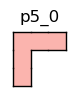

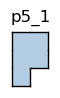

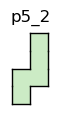

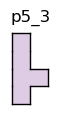

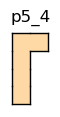

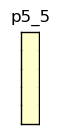

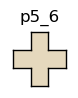

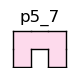

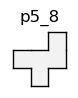

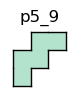

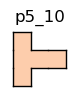

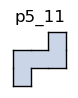

In [4]:
N = 8

def genPolys(p):
    """
    p est l'ensemble des x.piece quand x parcourt l'ensembles des polyominos de taille n
    genPolys(p) renvoie  l'ensemble des x.piece quand x parcourt l'ensembles des polyominos de taille n + 1
    """
    q = set()
    for piece0 in p:
        for i0,j0 in piece0:
            for i, j in [(i0, j0 + 1), (i0, j0 - 1), (i0 + 1, j0), (i0 - 1, j0)]:
                if (i, j) not in piece0:
                    Piece = PIECE('', piece0 | frozenset([(i, j)]))
                    if q.isdisjoint(Piece.isometriques()):
                        q.add(Piece)
    return {x.piece for x in q}

_p = [set(),{frozenset([(0,0)])}]
for n in range(N - 1): 
    _p.append(genPolys(_p[-1]))
    
polyominos = [[PIECE(f'p{i}_{j}', piece, couleur=palette[j%(len(palette))]) 
                for j, piece in enumerate(sorted(list(e),key = hash))]
                for i, e in enumerate(_p)]

for e in polyominos: 
    for p in e: globals()[p.nom] = p    

# Exemple, les 12 pentominos
# Noter que, par ex., p5_3 == polyominos[5][3]
for p in polyominos[5]: p.plot()


In [5]:

class PUZZLE:

    def __init__(self,pieces,
                      min_i,max_i,min_j,max_j,
                      conditions = None,
                      strict = True):
        """pieces : liste de PIECE
        min_i,max_i,min_j,max_j : definition du plateau
        conditions : couple d'entiers -> booleen restreignant le plateau
    
        1er cas  : strict = True
            Pour chacun des noms des pieces, il faut placer 
            une et une seule piece portant ce nom.
            Les elements de E sont les noms des pieces
            et les cases (couples d'entiers) du plateau.
            Chaque element de F contient un et un seul nom
            et les cases du plateau utilisees par une piece de ce nom..
        
        2eme cas : strict = False
            Pour chaque piece de pieces, on dispose,
            pour resoudre le puzzle, d'autant d'exemplaires
            que l'on veut de la piece.
            Les elements de E sont les cases du plateau.
        """
        self.min_i = min_i
        self.max_i = max_i
        self.min_j = min_j
        self.max_j = max_j
        self.strict = strict
        self.pieces = pieces
        if not conditions:
            conditions = lambda i,j: True
        lignes = dict()
        nbLignes = 0
        for p in pieces:
            for u in range(min_i, max_i - p.largeur + 2):
                for v in range(min_j, max_j - p.hauteur + 2):
                    ligne = [p.nom] if self.strict else []
                    match = True
                    for i,j in p.piece:
                        ic, jc = i + u, j + v
                        if conditions(ic,jc):
                            ligne.append((ic,jc))
                        else:
                            match = False
                            break
                    if match:
                        lignes[nbLignes] = ligne
                        nbLignes += 1
        self.lignes = lignes
        
    def solve(self):
        
        F = self.lignes
        return AlgorithmeX(F).solve()

    def printSolution(self,sol):     
        for l in sol: print(self.lignes[l])

    def plotSolution(self,sol):

        fig = plt.figure(facecolor='w')
        ax = fig.add_subplot(111)
        ax.axis('off')
        ax.axis('equal')
        if not self.strict:
            random.seed('314')
        for l in sol:
            e = set()
            for c in self.lignes[l]:
                if type(c) == tuple:
                    e.add(c)
                else:
                    couleur = eval(c).couleur 
            if not self.strict: couleur = randomColor()
            PIECE.plotPolyomino(ax, e, couleur)

### Exemple 1

['p5_8', (1, 3), (3, 3), (2, 3), (3, 4), (2, 2)]
['p5_1', (5, 3), (3, 2), (4, 3), (5, 2), (4, 2)]
['p5_5', (8, 2), (8, 5), (8, 1), (8, 4), (8, 3)]
['p5_10', (6, 3), (5, 1), (6, 2), (7, 1), (6, 1)]
['p5_3', (1, 6), (1, 5), (2, 6), (1, 8), (1, 7)]
['p5_11', (2, 7), (4, 7), (3, 7), (4, 6), (2, 8)]
['p5_0', (4, 8), (5, 7), (5, 6), (3, 8), (5, 8)]
['p5_9', (3, 5), (1, 4), (2, 5), (3, 6), (2, 4)]
['p5_2', (7, 4), (7, 3), (6, 5), (6, 4), (7, 2)]
['p5_4', (1, 2), (1, 1), (3, 1), (4, 1), (2, 1)]
['p5_7', (6, 8), (8, 8), (6, 7), (7, 8), (8, 7)]
['p5_6', (6, 6), (7, 7), (8, 6), (7, 6), (7, 5)]


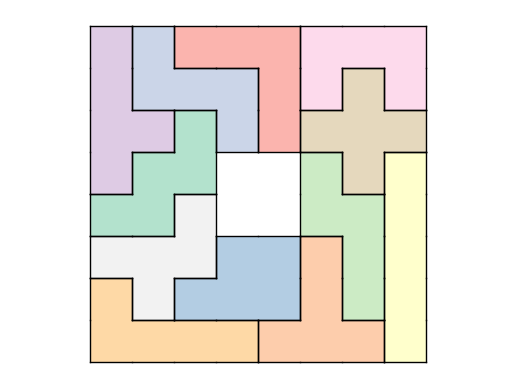

In [6]:
# 65 solutions

F = p5_8
pentominos = [F]
for p in polyominos[5]: 
    if p != F: pentominos += p.isometriques()

puzzle = PUZZLE(pentominos,1,8,1,8,
                conditions = (lambda i,j: not (4 <= i <= 5 and 4 <= j <= 5)))
    
s = puzzle.solve()
        
sol = next(s)
puzzle.printSolution(sol)
puzzle.plotSolution(sol)

### Exemple 2

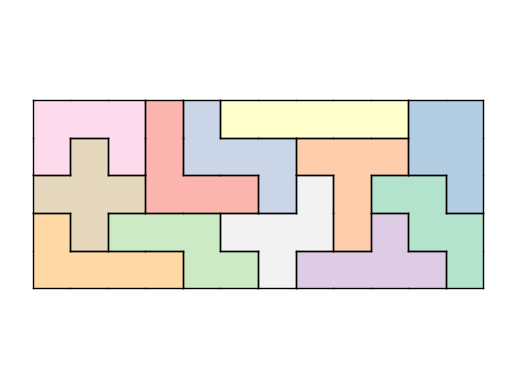

In [7]:
# 1010 solutions

pentominos = [F,F.rotation()]
for p in polyominos[5]: 
    if p != F: pentominos += p.isometriques()

puzzle = PUZZLE(pentominos,1,12,1,5)
    
s = puzzle.solve()
        
sol = next(s)
puzzle.plotSolution(sol)


### Exemple 3

In [8]:
def unePiece(piece):
    puzzle = PUZZLE(piece.isometriques(),1,15,1,15,strict = False)    
    s = puzzle.solve()
    sol = next(s)
    puzzle.plotSolution(sol)

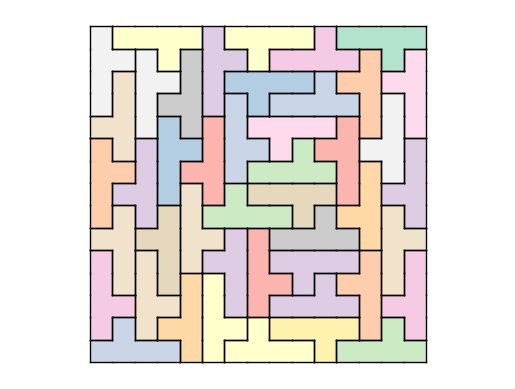

In [9]:
# 8 x 212 = 1696 solutions
Y = p5_3
unePiece(Y)